In [1]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('all_matches.csv')
data = data.drop(['match_id','season','start_date','ball','non_striker','wides','noballs','byes','legbyes','penalty','wicket_type','player_dismissed','other_wicket_type','other_player_dismissed'],axis = 1)
data

,venue,innings,batting_team,bowling_team,striker,bowler,runs_off_bat,extras
0,M Chinnaswamy Stadium,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,0,1
1,M Chinnaswamy Stadium,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,0,0
2,M Chinnaswamy Stadium,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,0,1
3,M Chinnaswamy Stadium,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,0,0
4,M Chinnaswamy Stadium,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,0,0
...,...,...,...,...,...,...,...,...
194349,"MA Chidambaram Stadium, Chepauk, Chennai",2,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,AD Russell,0,0
194350,"MA Chidambaram Stadium, Chepauk, Chennai",2,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,AD Russell,1,0
194351,"MA Chidambaram Stadium, Chepauk, Chennai",2,Sunrisers Hyderabad,Kolkata Knight Riders,MK Pandey,AD Russell,1,0
194352,"MA Chidambaram Stadium, Chepauk, Chennai",2,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,AD Russell,1,0


In [7]:
venues = data['venue'].unique()
venues.shape

(42,)

In [9]:
team = data['batting_team'].unique()
team.shape

(15,)

In [10]:
batsman = data['striker'].unique()
batsman.shape

(540,)

In [11]:
bowler = data['bowler'].unique()
bowler.shape

(422,)

In [16]:
main_data = np.array(data)
main_data.shape

(194354, 8)

In [31]:
X = []
Y = []
for i in range(194354):
    temp = np.zeros((6))
    for j in range(len(venues)):
        if venues[j] == main_data[i][0]:
            temp[0] = j / len(venues)
            break
            
    if main_data[i][1] == 1:
        temp[1] = 0
    else:
        temp[1] = 1
        
    for j in range(len(team)):
        if team[j] == main_data[i][2]:
            temp[2] = j / len(team)
            break
            
    for j in range(len(team)):
        if team[j] == main_data[i][3]:
            temp[3] = j / len(team)
            break
    
    for j in range(len(batsman)):
        if batsman[j] == main_data[i][4]:
            temp[4] = j / len(batsman)
            break
            
    for j in range(len(bowler)):
        if bowler[j] == main_data[i][5]:
            temp[5] = j / len(bowler)
            break
            
    X.append(temp)
    Y.append((int(main_data[i][6]) + int(main_data[i][7]))/7)        

1.0


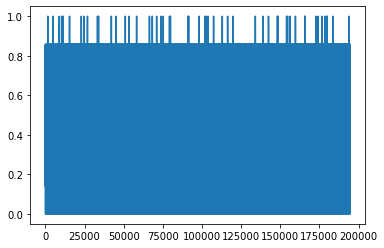

In [32]:
import matplotlib.pyplot as plt
print(np.max(Y))
plt.plot(Y)

In [67]:
X_train = X[0:155483]
Y_train = Y[0:155483]
X_test = np.array(X[155483:194354])
Y_test = np.array(Y[155483:194354])
X_train = np.reshape(np.array(X_train),(len(X_train),6,1))
X_test = np.reshape(np.array(X_test),(len(X_test),6,1))
Y_train = np.reshape(np.array(Y_train),(len(Y_train),1))
Y_test = np.reshape(np.array(Y_test),(len(Y_test),1))

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (6,1) ))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 6, 50)             10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [73]:
model.fit(X_train,Y_train,batch_size=1,epochs=1)

155483/155483 [==============================] - 495s 3ms/step - loss: 0.0514


In [75]:
predictions = model.predict(X_test)

In [76]:
rmse = np.sqrt(np.mean(predictions - Y_test)**2)
rmse

0.004626654112620788